<br />
<p align="center">
  <img src="images/dtlogo.png" alt="Logo" width="111" height="100">

  <h1 align="center">PID controller Exercise</h1>
</p>


### Requirements:

You need to .....

1. simualtion track
2. hardware track
    - DB21M up and running
    - 2 AprilTags

### Intended outcomes:

Calibrate the Duckiebot kinematic model using the data from the wheel encoders.

### Steps:

1. Theory  
2. Approach
3. Implementation
4. Validation



1. Theory -> Review odometry class
2. Approach -> 
    - Use wheel encoders to estimate the pose of the DB using deadrecknonig approximation. 
    - Use estimate and ground truth to best fit

3. Implementation ->
    - Read the data from the wheel encoders 
        - Sim:
        - HW :
            
    - Obtain the gorund truth from AprilTags


4. Validation

1. Theoretical understanding of the Duckiebot kinematic model, in particular what the parameters _R_ and _L_ represent.
2. Approach:
    - Wheel encoders and deadrecknonig
    
    - Straight path 
    - Curved path (e.g., sinusoidal)

3. Validation of the resulting parameters.



## Let's start

In this activity...

**DO NOT CHANGE THE NAME OF THE FUNCTION**

In [3]:
import numpy as np
# Heading control
def PIDController(
    v_0, 
    y_hat, 
    prev_e_y, 
    prev_int_y, 
    delta_t):
    """
    Args:
        v_0 (:double:) speed (can be changed setting up a v_0 variable).
        y_hat (:double:) the current estiamted pose along y.
        prev_e_y (:double:) previous error along y with respect to the setpoint.
        prev_int_y (:double:) previous integral error term (useful fo the integral action).
        delta_t (:double:) delta time.
    returns:
        u (:double:) control command for omega.
        current_e (:double:) current error.
        current_int_e (:double:) current integral error.
    """
    ## Set outside this function:
    # gain = 0.45
    # x0, y0, theta0 = [0, 0, 0]
    
    
    v_0=0.2

    # Error along x

    y_ref = -0.10

    # error
    e_y = y_ref - y_hat

    # integral of the error
    e_int_y = prev_int_y + e_y*delta_t

    # antiwindup
    e_int_y = max(min(e_int_y,3),-3)

    # derivative of the error
    e_der_y = (e_y - prev_e_y)/delta_t

    # PID parameters

    Kp_y=.8
    Ki_y=0.002
    Kd_y=3
    
    # PID controller for omega
    omega = Kp_y*e_y + Ki_y*e_int_y + Kd_y*e_der_y
    
    u = [v_0, omega]
    
    #print(f"\n\nDelta time : {delta_t} \nE : {e_y} \nE int : {e_int_y} \nPrev e : {e_der_y}\nU : {u} \nX_hat : {y_hat} \n")
    
    return u, e_y, e_int_y


### Unit Test

With this unit test you can check if your PID is converging, diverging, osscilating and so on. This is a macroscopic test, it could be that then on the real robot it will not perform as here!

err_y 2.0724293814666783e-06, y_hat -0.10000207242938147


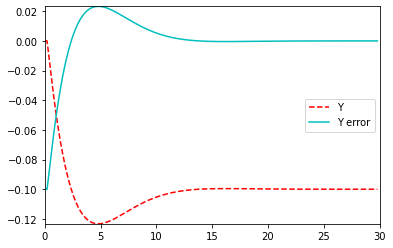

In [4]:
import matplotlib.pyplot as plt
from unit_test import UnitTestPID

unit_test = UnitTestPID(PIDController, 0.2)
unit_test.test()


### Build the Activity

In [ ]:
! cd .. && dts exercises build

### Run the activity on the Duckiebot



Open the terminal, navigate into the exercise folder
In the first terminal you have to run the exercises with the standard `dts exercises` command:

In [ ]:
! cd .. && dts exercises test --duckiebot_name ![DB_NAME] 

In [ ]:
! dts keyboard_control ![DB_NAME]

#### Terminal 3

In the third terminal you have to attach the container where the  activity is running. 

#### Terminal 2

In this terminal you have to open the `keyboard_control` in order to drive you Duckiebot.


In [ ]:
! docker -H ![DB_NAME].local exec -it agent /bin/bash

Now you are attached to the Docker container that is running on the robot. From this terminal launch the python script that allows you to proceed witht the calibration as shown below. You will be asked to place your Duckiebot on a lane and move it along a straight line using the `keyboard_control`.

In [ ]:
python3 /code/exercise_ws/src/interaction_pkg/src/interaction_node.py